### Attrition Model Building using Random Forest ###
This is the sequel to the Decision Tree Model Building for predicting employee churn. Given that a single decision tree is prone to overfitting and can cause high variance depending on the test train split, it is a logical step to extend the model from a single decision tree into a Random Forest to utilise the bagging technique to reduce variance whilst keeping the bias low. 

This exercise explores the utilisation of Scikit-learn's Random Forest Regressor to build a RF Model and evaluate its performance compared to the Decision Tree.

What is missing however, is the infra and computational cost aspect of the models. Given that the sample dataset is small, performance is NOT expected to be different enough to be noticeable.

We will however try to map the time taken between the best Decision Tree depth and the Random Forest Model as a note for comparison along side accuracy

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Why are employees leaving.csv")  #Loading file into my Notebook
df.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Division,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Division               14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [3]:
df_encoded = df.copy()

division_encoder = LabelEncoder()
salary_encoder = LabelEncoder()
df_encoded['Division'] = division_encoder.fit_transform(df_encoded['Division'])
df_encoded['salary'] = salary_encoder.fit_transform(df_encoded['salary'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Division               14999 non-null  int64  
 10  salary                 14999 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.3 MB


In [4]:
# The Encodings are done as follows:

print (dict(zip(division_encoder.classes_, division_encoder.transform(division_encoder.classes_))))
print (dict(zip(salary_encoder.classes_, salary_encoder.transform(salary_encoder.classes_))))

{'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4, 'marketing': 5, 'product_mng': 6, 'sales': 7, 'support': 8, 'technical': 9}
{'high': 0, 'low': 1, 'medium': 2}


In [5]:
df_encoded.isnull().sum()

ID                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Division                 0
salary                   0
dtype: int64

In [11]:
X = df_encoded.drop(columns=['left', 'ID'])
y = df_encoded['left']

In [10]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 14999
Number of Features: 9


In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)

#### Till the above point both approaches are the same. The dataset has been label encoded for categorical variables ####

## Initialising Random Forest ##

In [37]:
num_trees = 100
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = 'sqrt'

rf_model = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)

start_time = time.time()
rf_model.fit(X_trainset, y_trainset)
end_time = time.time()

print(f"Time taken to train the model: {end_time - start_time} seconds for {num_trees} trees")

y_pred = rf_model.predict(X_testset)

print(f"Accuracy: {accuracy_score(y_testset, y_pred)}")

Time taken to train the model: 0.5557389259338379 seconds for 100 trees
Accuracy: 0.9763333333333334


### Now lets test the effect of the number of trees and depth of each tree on the Accuracy and Time Taken ##

In [44]:
# Function to evaluate model performance for different numbers of trees
def evaluate_num_trees(max_depth):
    n_trees_range = range(10, 110, 10)
    accuracies = []
    training_times = []
    
    for n_trees in n_trees_range:
        # Initialize and train model
        rf = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  random_state=42)
        
        # Time the training
        start = time.time()
        rf.fit(X_trainset, y_trainset)
        end = time.time()
        
        # Make predictions and get accuracy
        y_pred = rf.predict(X_testset)
        acc = accuracy_score(y_testset, y_pred)
        
        training_times.append(end - start)
        accuracies.append(acc)
    
    return list(n_trees_range), accuracies, training_times


Evaluating max_depth = 3
Evaluating max_depth = 4
Evaluating max_depth = 5
Evaluating max_depth = 6
Evaluating max_depth = 7
Evaluating max_depth = 8
Evaluating max_depth = 9
Evaluating max_depth = 10


<Figure size 1500x800 with 0 Axes>

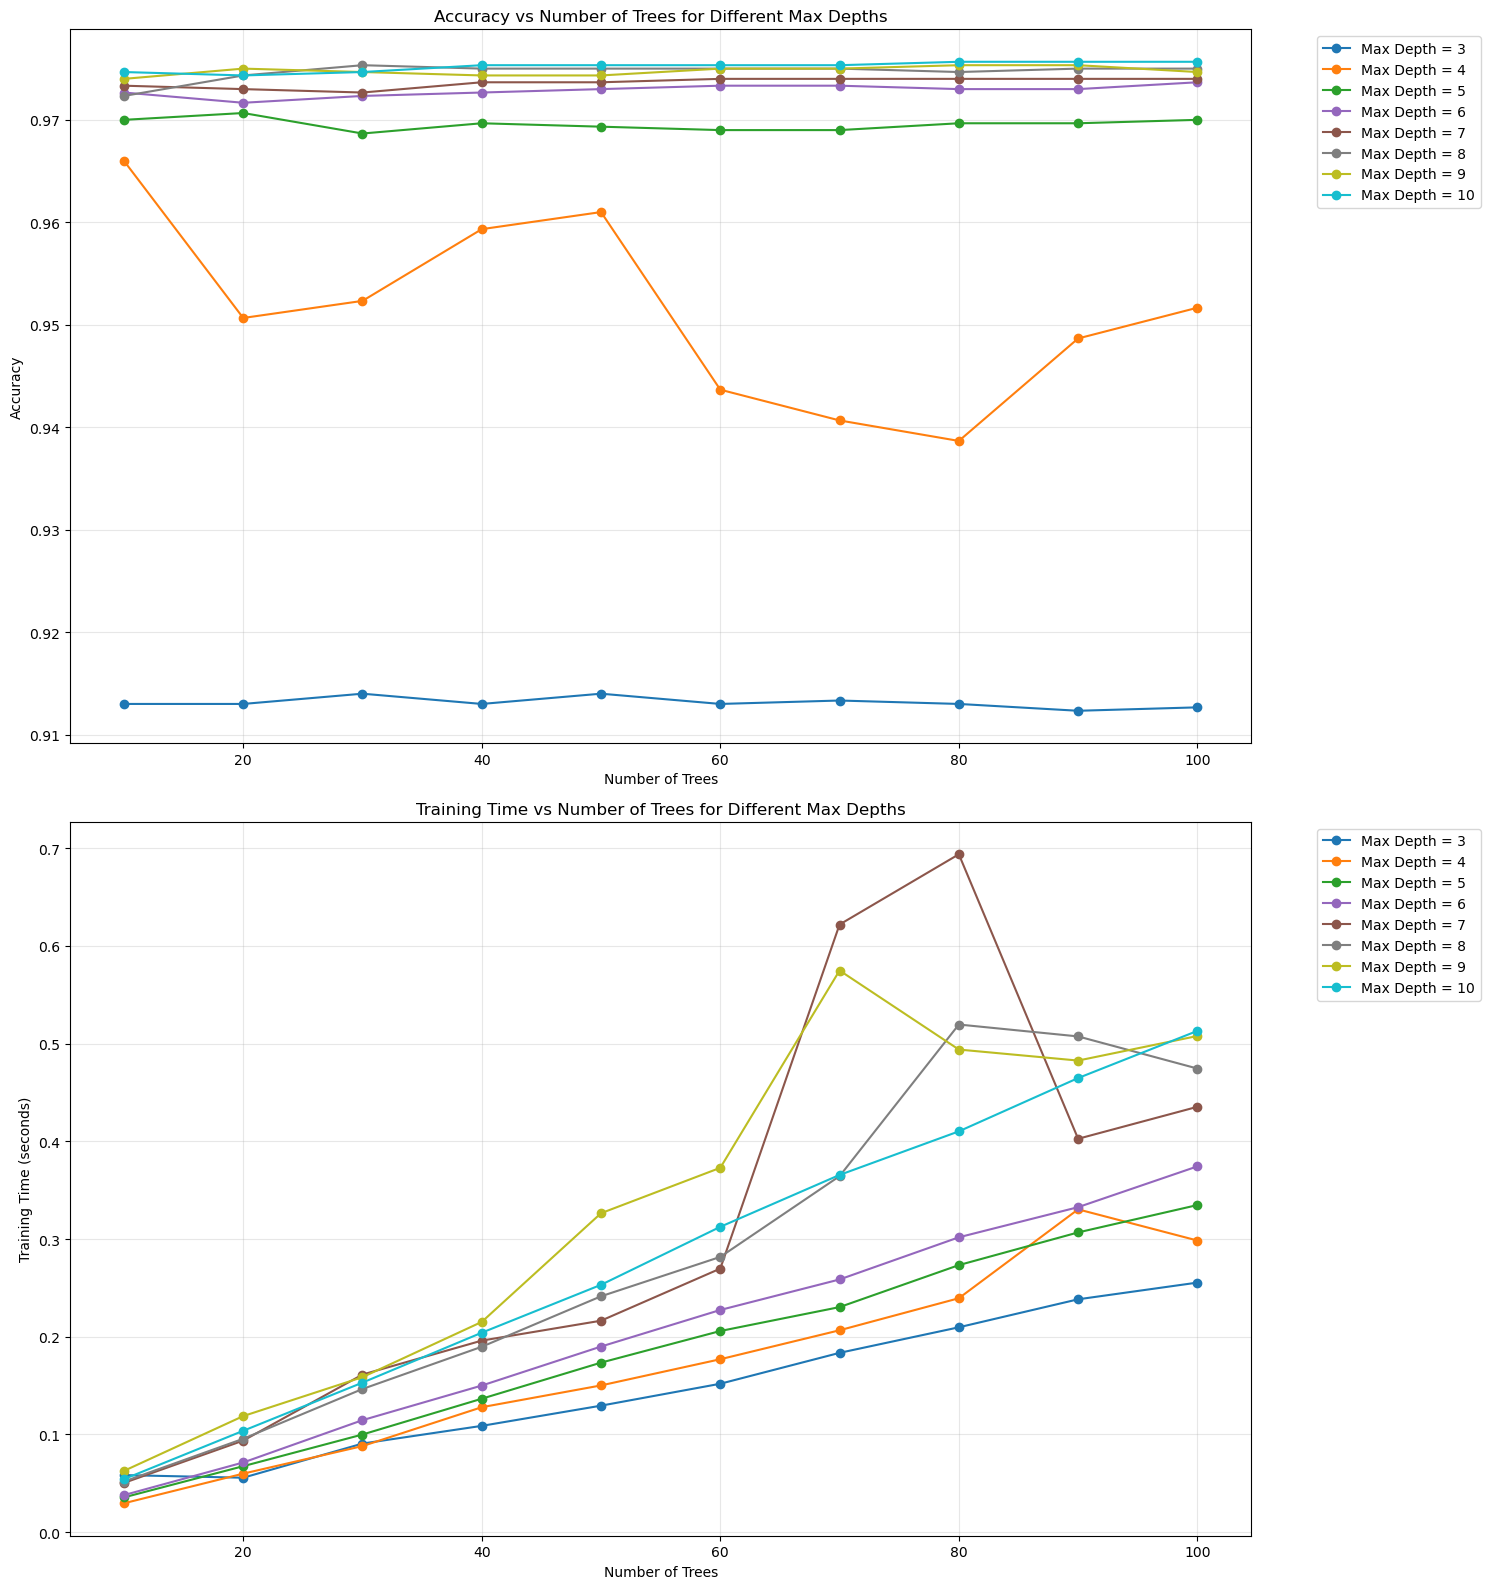

In [53]:
# Function to evaluate different max depths
def evaluate_max_depths(min,max):
    plt.figure(figsize=(15, 8))
    
    # Create a color palette for different depths
    colors = plt.cm.tab10(np.linspace(0, 1, max-min+1))
    
    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))
    
    for i, depth in enumerate(range(min, max+1)):
        print(f"Evaluating max_depth = {depth}")
        n_trees_range, accuracies, training_times = evaluate_num_trees(depth)
        
        # Plot accuracy vs number of trees for this depth
        ax1.plot(n_trees_range, accuracies, marker='o', label=f'Max Depth = {depth}', color=colors[i])
        
        # Plot training times vs number of trees for this depth
        ax2.plot(n_trees_range, training_times, marker='o', label=f'Max Depth = {depth}', color=colors[i])
    
    # Configure accuracy subplot
    ax1.set_xlabel('Number of Trees')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy vs Number of Trees for Different Max Depths')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Configure training time subplot
    ax2.set_xlabel('Number of Trees')
    ax2.set_ylabel('Training Time (seconds)')
    ax2.set_title('Training Time vs Number of Trees for Different Max Depths')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
# Run evaluation for different max depths
# evaluate_max_depths(3, 10)


Now Lets run this function for depths 1 to 5

Evaluating max_depth = 1
Evaluating max_depth = 2
Evaluating max_depth = 3
Evaluating max_depth = 4
Evaluating max_depth = 5


<Figure size 1500x800 with 0 Axes>

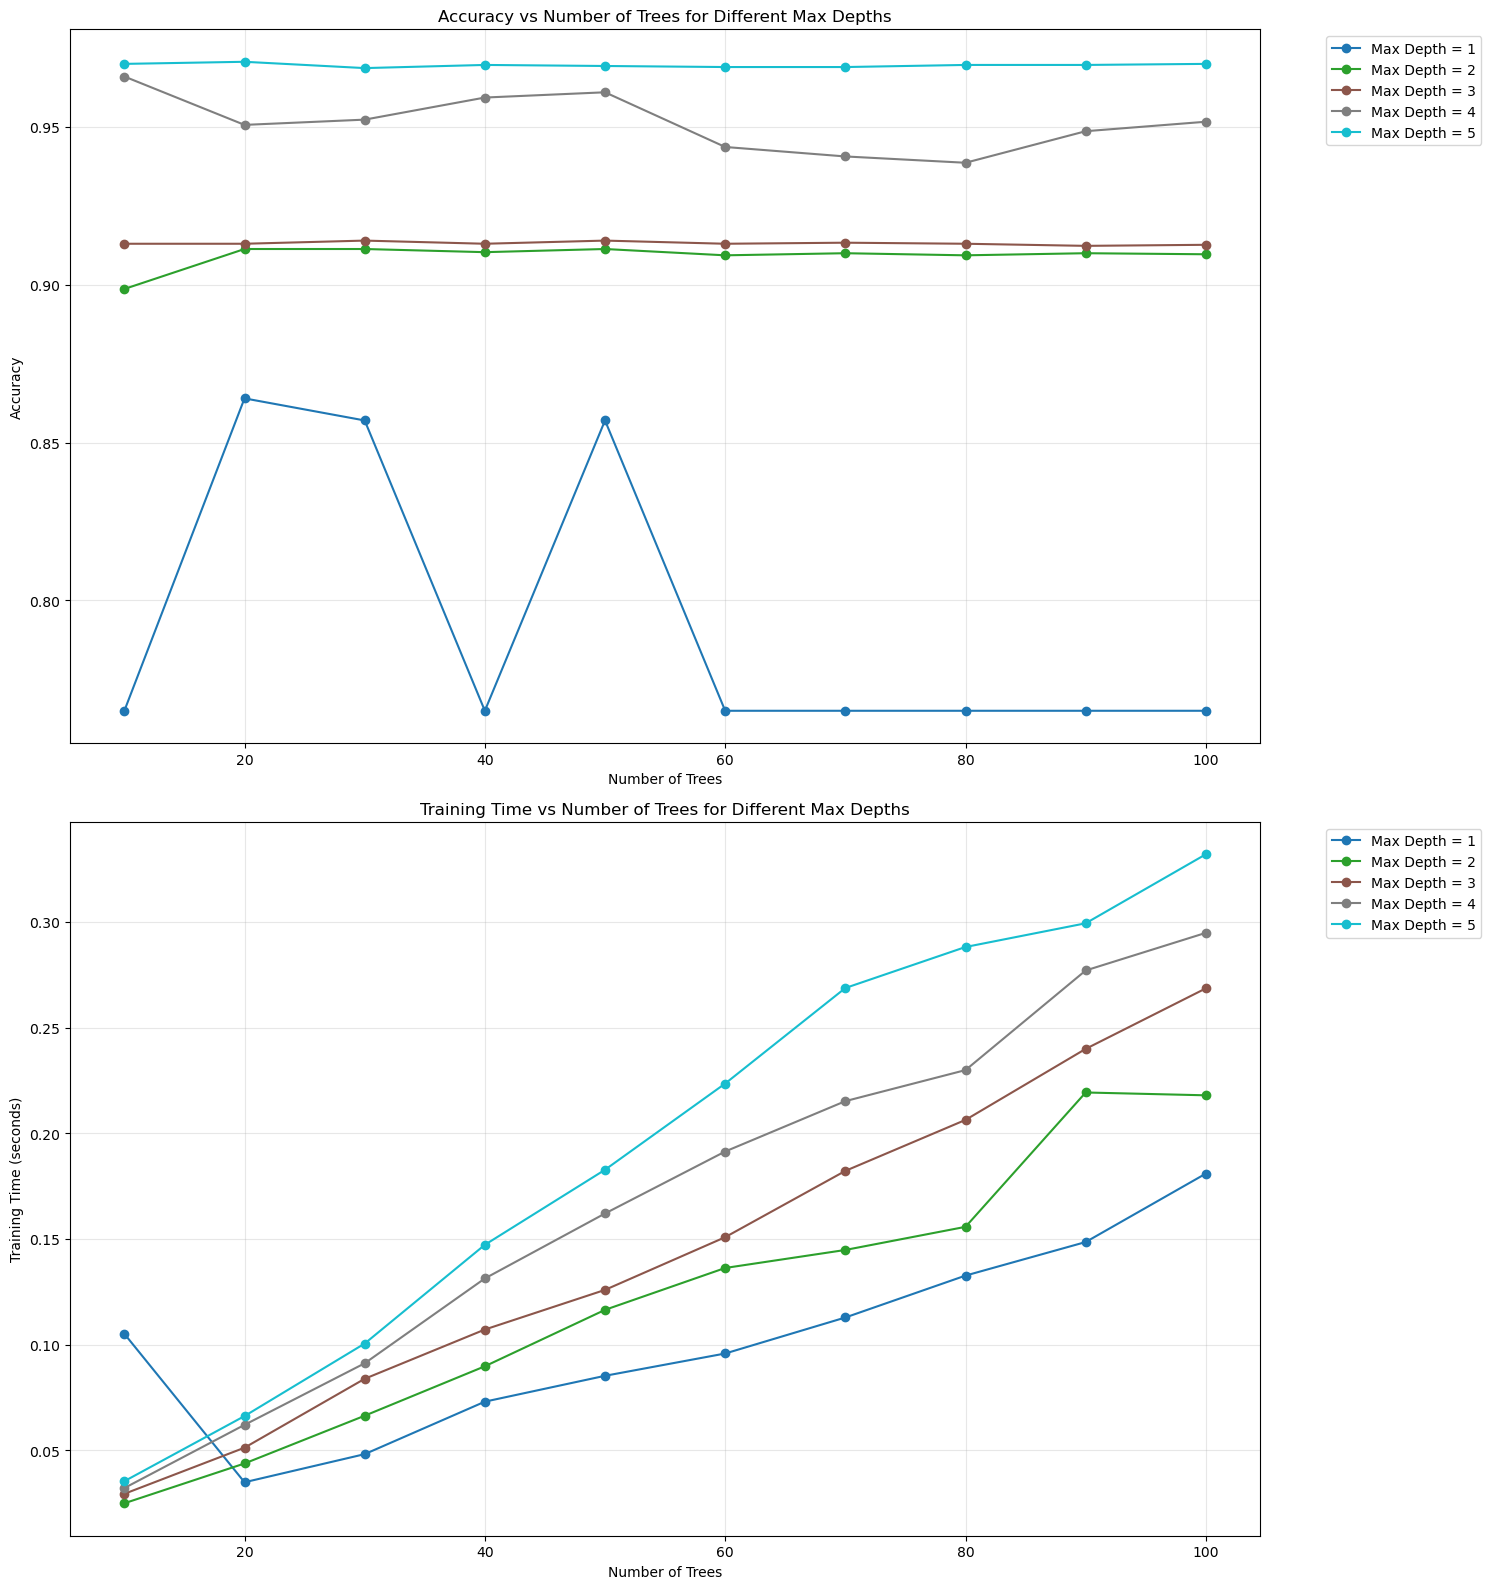

In [54]:
evaluate_max_depths(1,5)

It took a depth of 4 to achieve 95% accuracy, with some variation seen w.r.to number of trees. This indicates that there is less stability. Lets try with a higher depth i.e. 4 to 8

Evaluating max_depth = 4
Evaluating max_depth = 5
Evaluating max_depth = 6
Evaluating max_depth = 7
Evaluating max_depth = 8


<Figure size 1500x800 with 0 Axes>

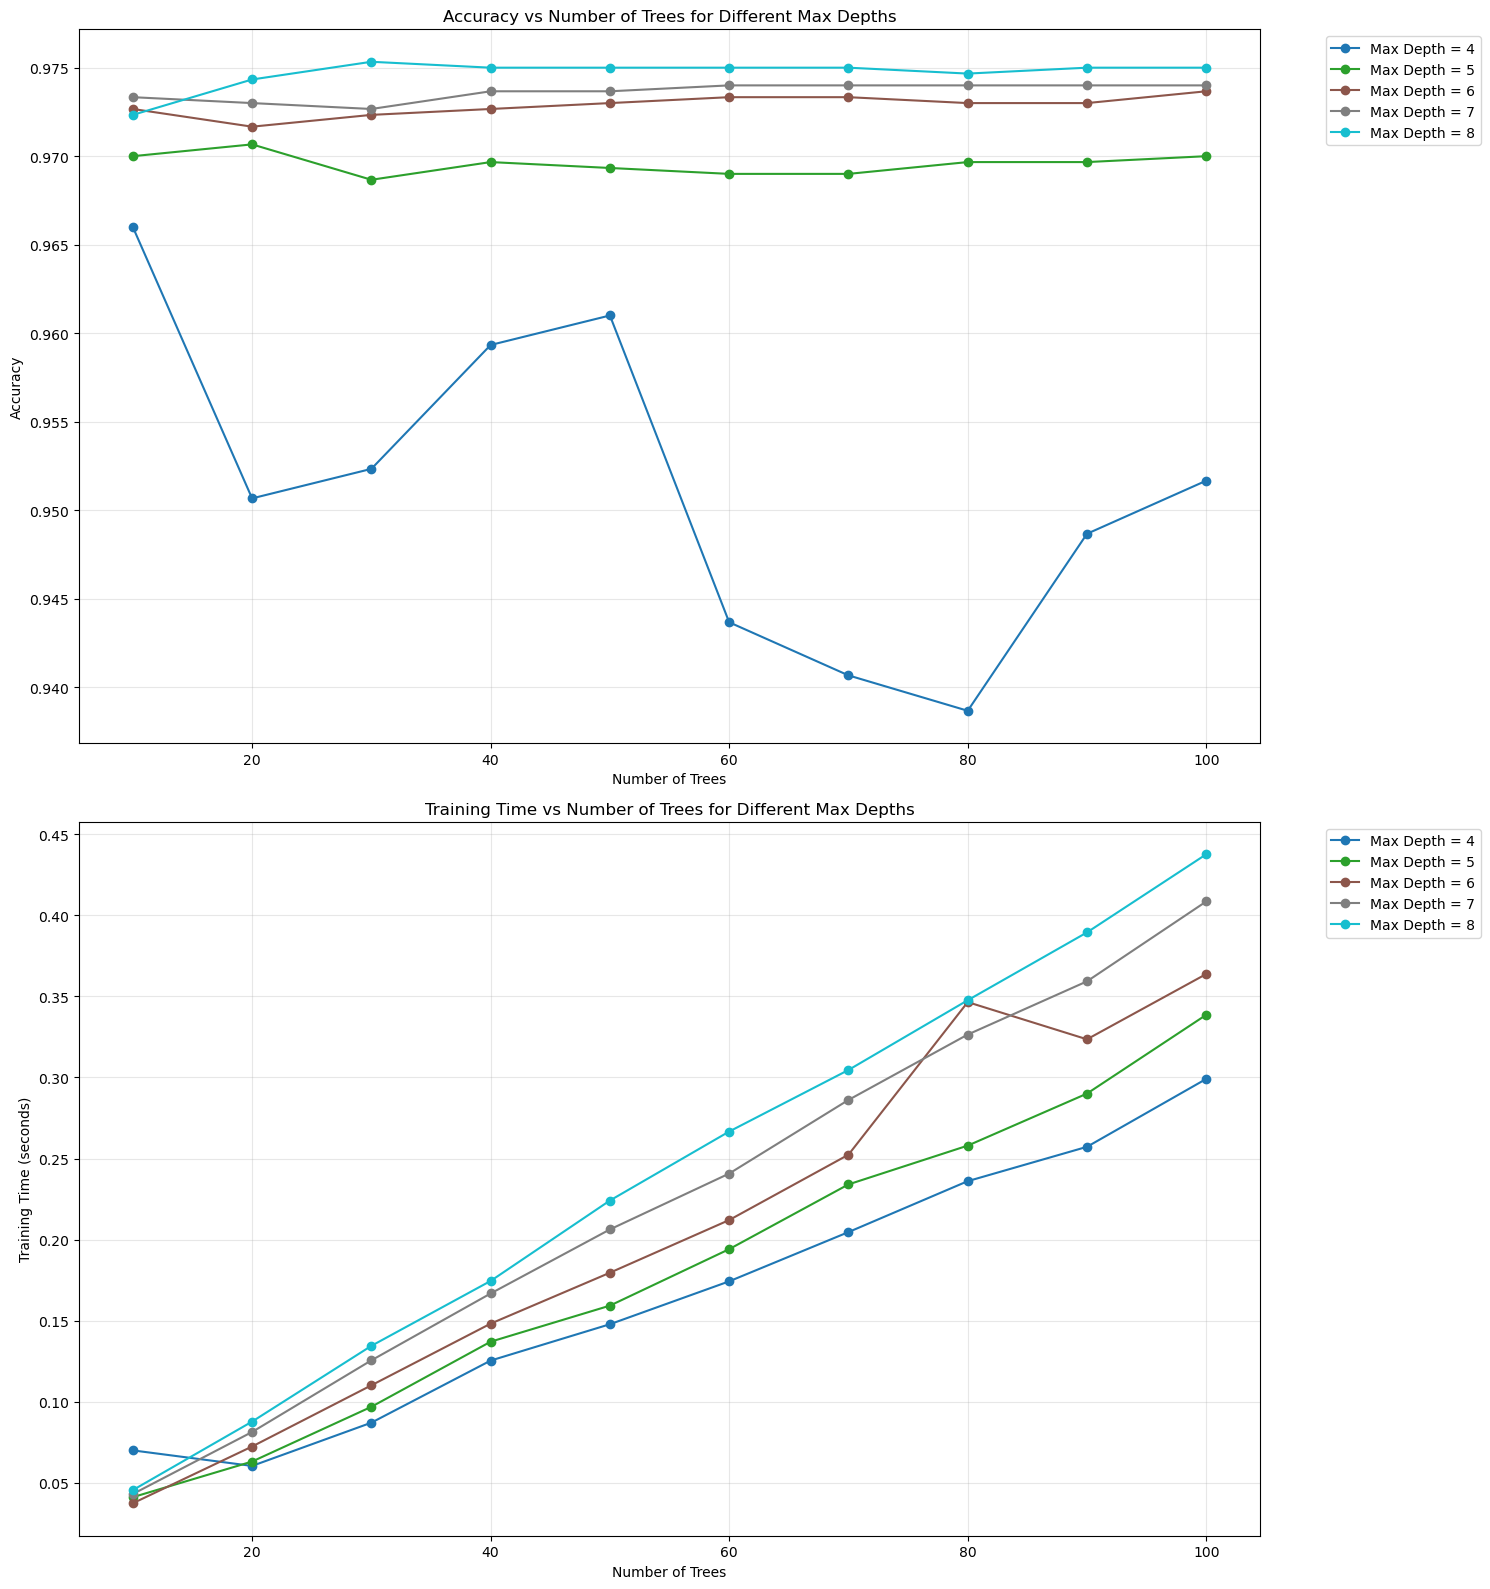

In [55]:
evaluate_max_depths(4,8)

Observations:
1. The accuracy gain is negligible after the depth exceeds 5.
2. At depth 5, the number of trees dont seem to influence the output as much, to save up on computation resources, we can choose 10 trees.

lets try varying the initial random seed to check if the results are consistent across different initialisation points. Lets define the same function but now its a function of randon sample instead of dept

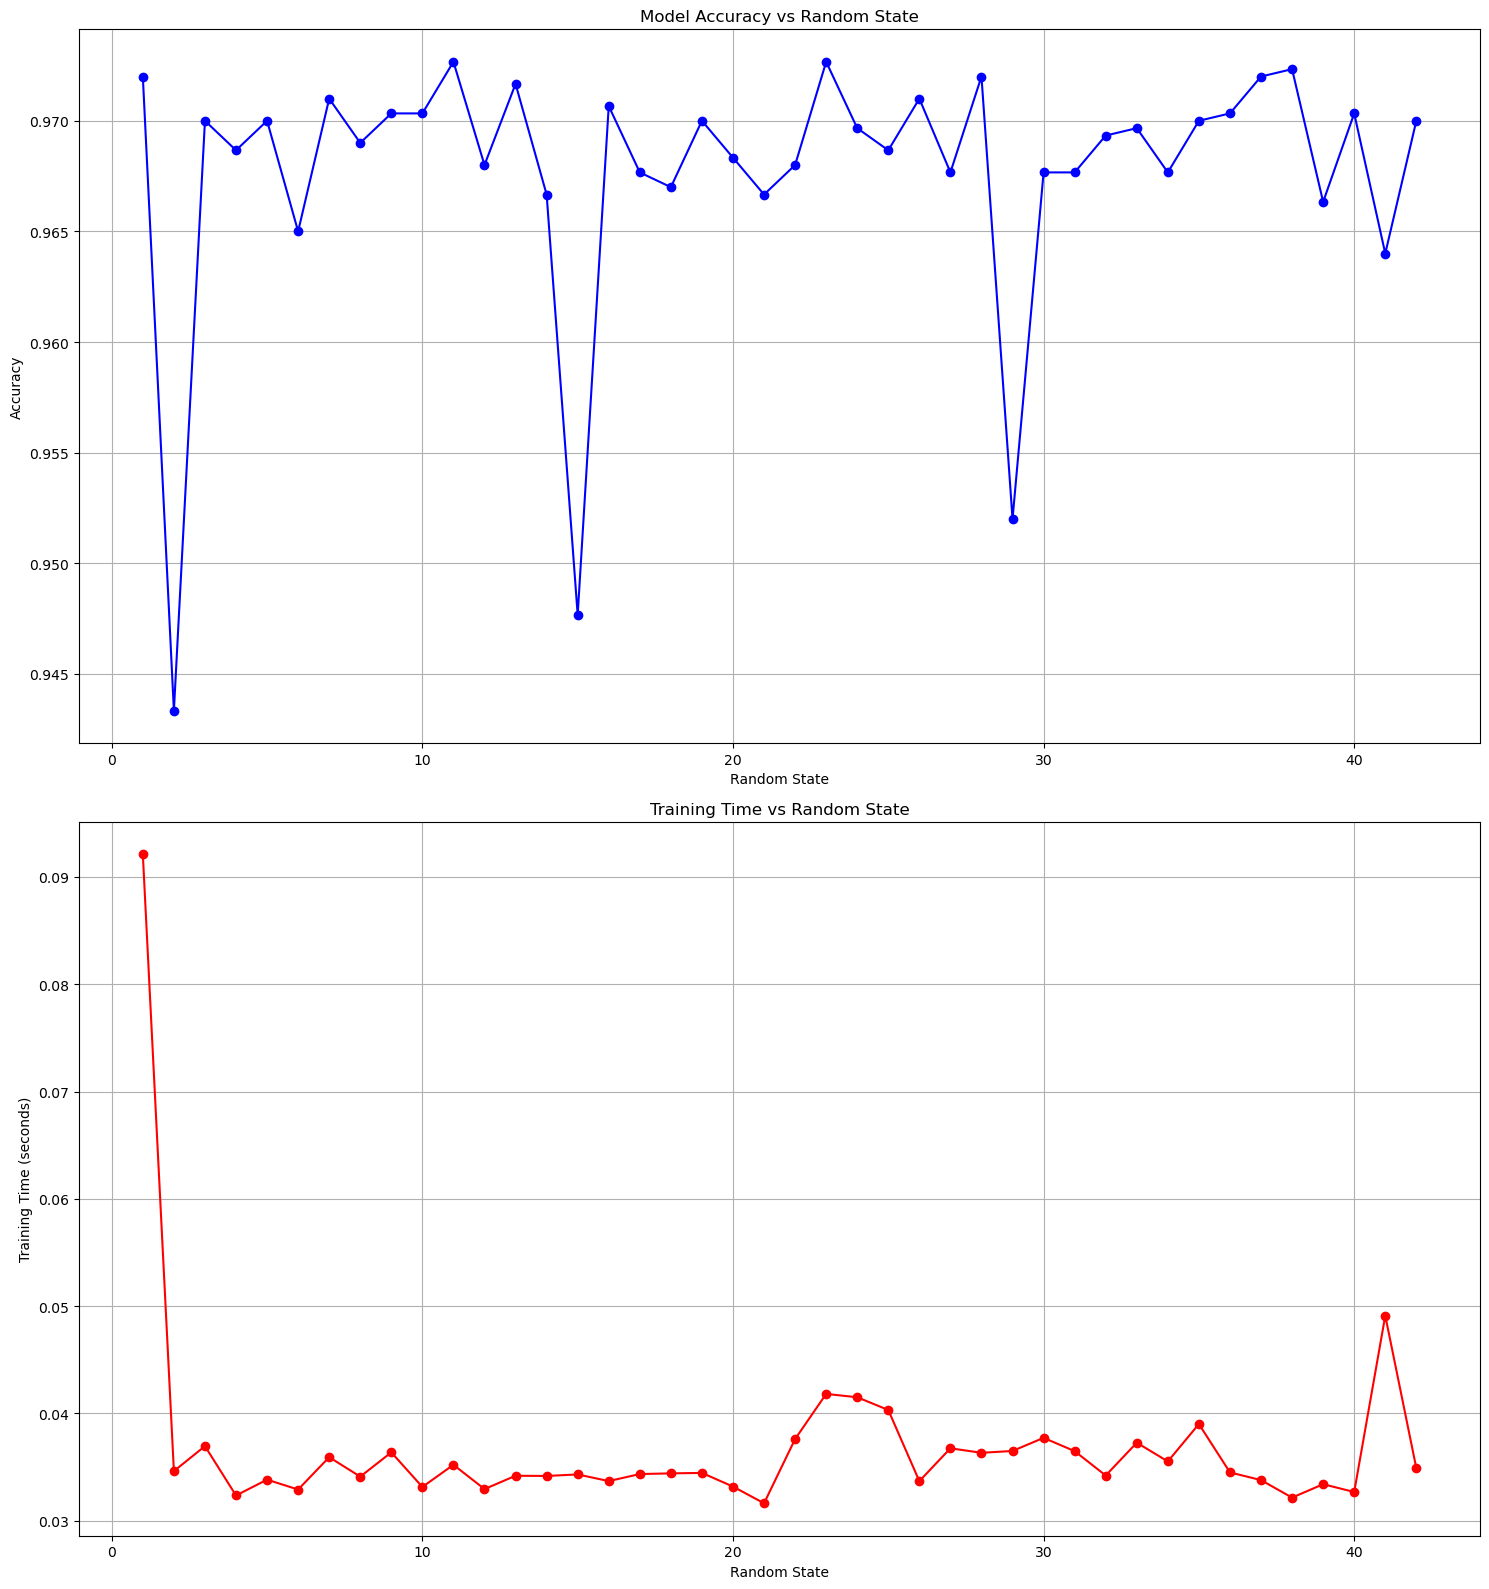

In [57]:
def evaluate_num_trees(rs):
    n_trees = 10
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=5, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  random_state=rs)
        
    # Time the training
    start = time.time()
    rf.fit(X_trainset, y_trainset)
    end = time.time()
    
    # Make predictions and get accuracy
    y_pred = rf.predict(X_testset)
    acc = accuracy_score(y_testset, y_pred)
    training_time = end - start
    return acc, training_time


def evaluate_random_states(start_rs, end_rs):
    # Create lists to store results
    accuracies = []
    times = []
    rs_values = range(start_rs, end_rs+1)
    
    # Evaluate for each random state
    for rs in rs_values:
        acc, training_time = evaluate_num_trees(rs)
        accuracies.append(acc)
        times.append(training_time)
    
    # Create figure with 2 subplots
    plt.figure(figsize=(15, 16))
    
    # Plot accuracies
    plt.subplot(2, 1, 1)
    plt.plot(rs_values, accuracies, 'bo-')
    plt.xlabel('Random State')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy vs Random State')
    plt.grid(True)
    
    # Plot training times
    plt.subplot(2, 1, 2)
    plt.plot(rs_values, times, 'ro-')
    plt.xlabel('Random State')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time vs Random State')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

evaluate_random_states(1, 42)

Except for a couple of random initialisation states, the majority of the initial states seem to provide accuracy scores between 96.5% and 97%